In [1]:
%scala

val data = sqlContext.read.parquet("/FileStore/tables/")
data.createOrReplaceTempView("StockData")
data.printSchema

root
-- timestamp: timestamp (nullable = true)
-- open: double (nullable = true)
-- high: double (nullable = true)
-- low: double (nullable = true)
-- close: double (nullable = true)
-- volume: integer (nullable = true)
-- Stock: string (nullable = true)

data: org.apache.spark.sql.DataFrame = [timestamp: timestamp, open: double ... 5 more fields]

In [2]:
%scala 

// val StockCompare = spark.sql("SELECT  Stock, CAST(MIN(timestamp) AS DATE) AS FirstQuote, CAST(MAX(timestamp) AS DATE) AS LastQuote, MIN(close) AS MinClose, MAX(close) AS MaxClose, (5000/MIN(close)) AS Shares, Max(Close)-Min(Close) AS PriceDiff, Max(Close) * (5000/MIN(close)) AS 5kToday, (Max(Close)-Min(Close)) / Min(Close) AS PctGain FROM StockData WHERE Stock IN ('EXPE','AMZN','SBUX') AND timestamp >= add_months(current_date(), -36) GROUP BY Stock")

val StockCompareViz = spark.sql("SELECT  Stock, CAST(MAX(timestamp) AS DATE) AS LastQuote, Max(Close) * (5000/MIN(close)) AS 5k, (Max(Close)-Min(Close)) / Min(Close) AS PctGain FROM StockData WHERE Stock IN ('EXPE','AMZN','SBUX') AND timestamp >= add_months(current_date(), -36) GROUP BY Stock")

display(StockCompareViz)

Stock,LastQuote,5k,PctGain
EXPE,2019-08-16,7967.0329670329675,0.5934065934065935
SBUX,2019-08-16,10209.105892047795,1.0418211784095592
AMZN,2019-08-16,14181.581765335779,1.8363163530671562


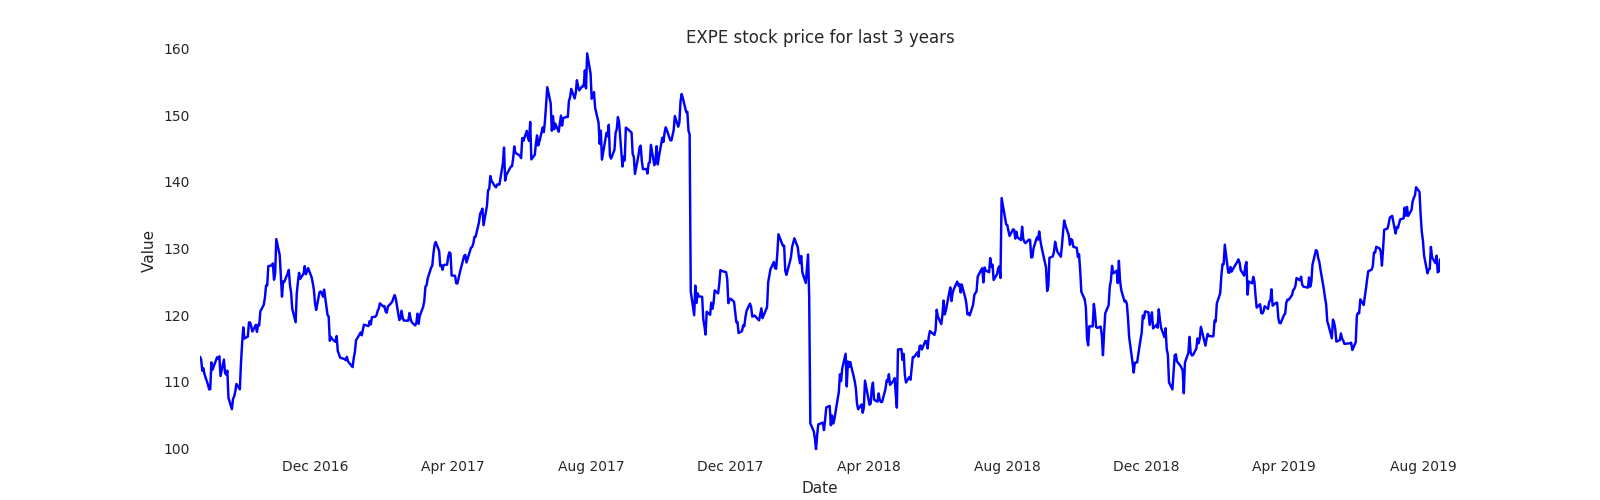

In [3]:
#https://www.machinelearningplus.com/time-series/time-series-analysis-python/

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
df = sqlContext.read.parquet("/FileStore/tables/")

df = spark.sql("SELECT CAST(timestamp AS DATE) AS date, Close AS value FROM StockData WHERE Stock = 'EXPE' AND timestamp >= add_months(current_date(), -36)")
pdf = df.toPandas().set_index('date')

# add_months(string start_date, int num_months)

# Draw Plot
def plot_pdf(pdf, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    display(plt.show())

plot_pdf(pdf, x=pdf.index, y=pdf.value, title='EXPE stock price for last 3 years')

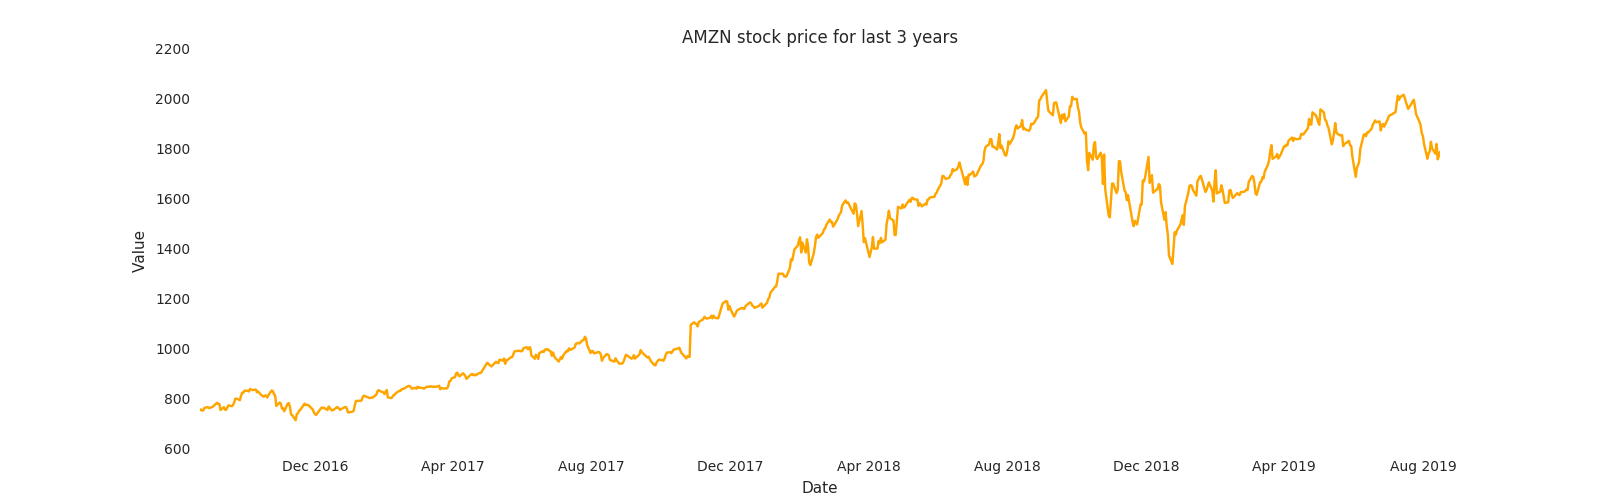

In [4]:
df = spark.sql("SELECT CAST(timestamp AS DATE) AS date, Close AS value FROM StockData WHERE Stock = 'AMZN' AND timestamp >= add_months(current_date(), -36)")
pdf = df.toPandas().set_index('date')

# add_months(string start_date, int num_months)

# Draw Plot
def plot_pdf(pdf, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='orange')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    display(plt.show())

plot_pdf(pdf, x=pdf.index, y=pdf.value, title='AMZN stock price for last 3 years')

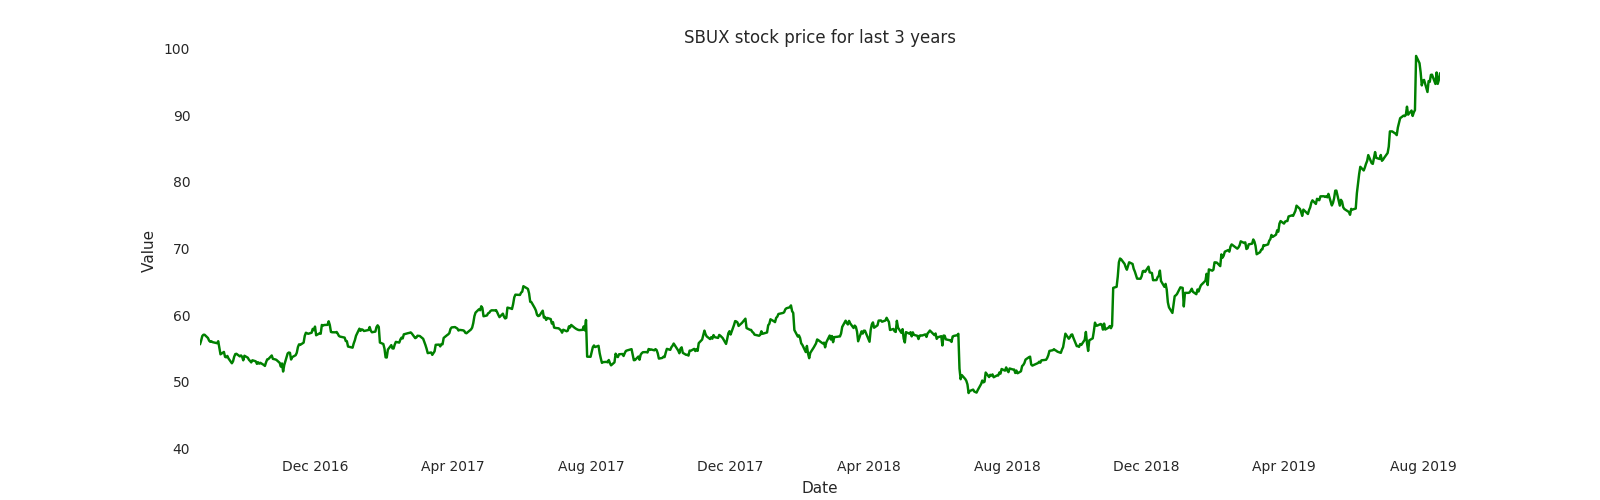

In [5]:
df = spark.sql("SELECT CAST(timestamp AS DATE) AS date, Close AS value FROM StockData WHERE Stock = 'SBUX' AND timestamp >= add_months(current_date(), -36)")
pdf = df.toPandas().set_index('date')

# add_months(string start_date, int num_months)

# Draw Plot
def plot_pdf(pdf, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    display(plt.show())

plot_pdf(pdf, x=pdf.index, y=pdf.value, title='SBUX stock price for last 3 years')